<a href="https://colab.research.google.com/github/GyanGartia/Machine-Learning/blob/main/lab1_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Graphs of Forest Fire dataset**

In [ ]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt

In [ ]:
# loading the data from the csv file to pandas dataframe
data = pd.read_csv('/content/drive/MyDrive/dataset/forestfires.csv')

In [ ]:
# X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
# Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
# month - month of the year: "jan" to "dec"
# day - day of the week: "mon" to "sun"
# FFMC - FFMC index from the FWI system: 18.7 to 96.20 (fine fuel moisture code)
# DMC - DMC index from the FWI system: 1.1 to 291.3 (Duff Moisture Code)
# DC - DC index from the FWI system: 7.9 to 860.6  (drought code)
# ISI - ISI index from the FWI system: 0.0 to 56.10 (Initial Spread Index)
# temp - temperature in Celsius degrees: 2.2 to 33.30
# RH - relative humidity in %: 15.0 to 100
# wind - wind speed in km/h: 0.40 to 9.40
# rain - outside rain in mm/m2 : 0.0 to 6.4
# area - the burned area of the forest (in ha): 0.00 to 1090.84

In [ ]:
# printing the first 5 rows of the dataframe
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
# number of rows and columns in the data frame
data.shape

(517, 13)

In [ ]:
data.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [ ]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [ ]:
rows_without_missing_data = data.dropna()
rows_without_missing_data.shape

(517, 13)

In [ ]:
print("Data Types:", data.dtypes)

Data Types: X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object


In [ ]:
# month_order = ("jan", "feb", "mar", "apr", "may", "jun",  "jul", "aug", "sep",  "oct", "nov", "dec")
# dow_order = ("mon", "tue", "wed", "thu", "fri", "sat", "sun")
# forest_fires = data
#   mutate(
#     month = factor(month, levels = month_order),
#     day = factor(day, levels = dow_order)
#   )

# head(forest_fires)

In [ ]:
# Shows the highes area in km
data.sort_values(by="area", ascending=False).head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84
415,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28
479,7,4,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53
237,1,2,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88
236,2,2,sep,sat,92.5,121.1,674.4,8.6,18.2,46,1.8,0.0,200.94


In [ ]:
# total number of values in month and day feature
data['month'].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [ ]:
data['day'].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [ ]:
# column for area in kilometers. and convert hector to kilometer
data['area_km'] = data['area'] / 100
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_km
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0.0000
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0.0000
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0.0000
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0.0000
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0.0644
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0.5429
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0.1116
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0.0000


In [ ]:
# Shows the highes area in km
data.sort_values(by="area_km", ascending=False).head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_km
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84,10.9084
415,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28,7.4628
479,7,4,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53,2.7853
237,1,2,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88,2.1288
236,2,2,sep,sat,92.5,121.1,674.4,8.6,18.2,46,1.8,0.0,200.94,2.0094


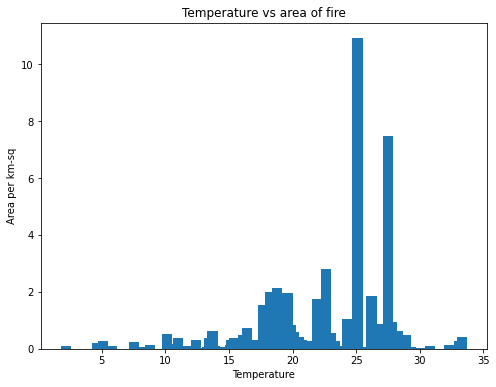

In [ ]:
highest_fire_area = data.sort_values(by="area_km", ascending=True)

plt.figure(figsize=(8, 6))

plt.title("Temperature vs area of fire" )
plt.bar(highest_fire_area['temp'], highest_fire_area['area_km'])

plt.xlabel("Temperature")
plt.ylabel("Area per km-sq")
plt.show()

In [ ]:
numerical_feature = data.describe(include=["int", "float"]).columns

# Print it in list type ..
print(list(numerical_feature))

['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'area_km']


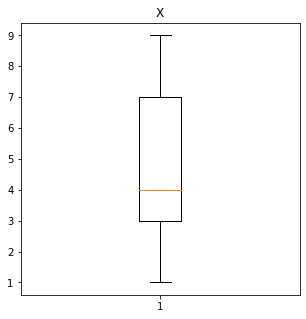

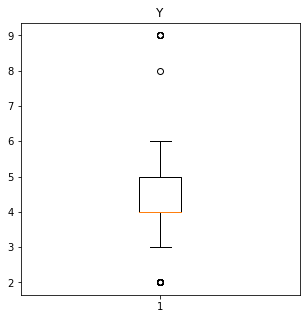

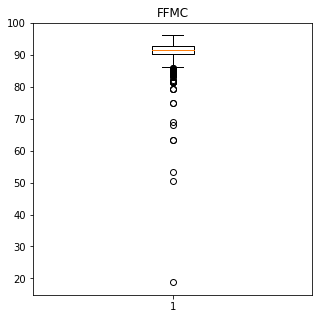

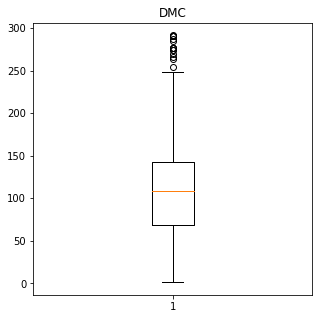

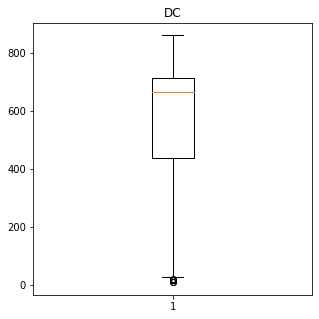

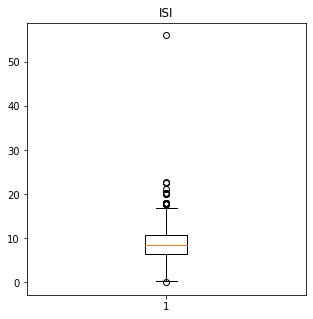

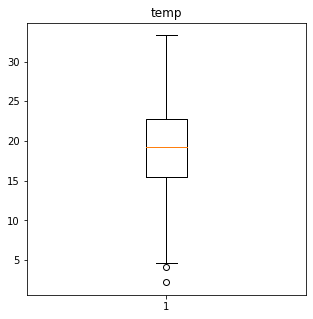

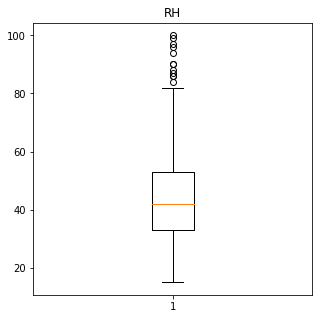

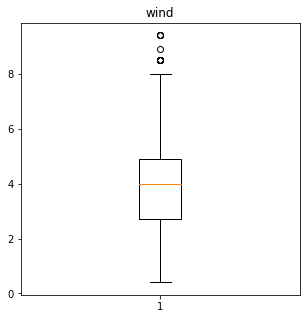

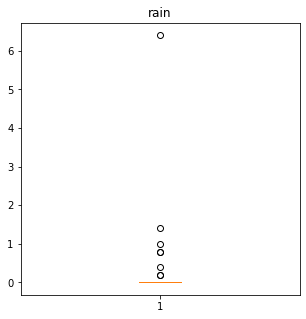

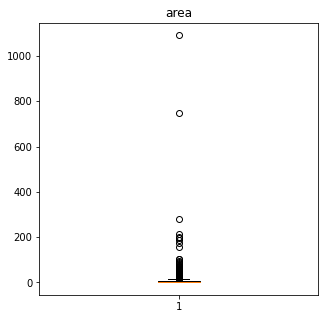

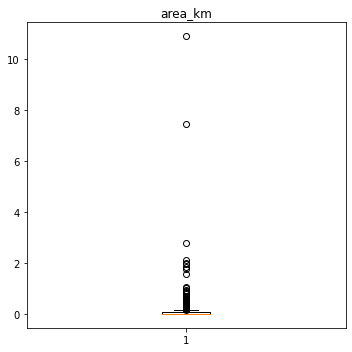

In [ ]:
# boxplot
for idx, col  in enumerate(numerical_feature, 1):
    plt.figure(figsize=(5,5))
    
#     plt.subplot(len(numerical_feature) // 2, 3, idx)
    plt.boxplot(data[col])

    plt.title(col)
#     plt.hist(forest_df[col])

plt.tight_layout()
plt.show(plt)

In [ ]:
new_data = data.rename(columns = {"temp": "Temp"})

In [ ]:
# groupby the months ,wind,temperatue and rain in the dataset

month=data.groupby(['month'])['wind'].mean().reset_index()
temp=data.groupby(['month'])['temp'].mean().reset_index()
RH=data.groupby(['month'])['RH'].mean().reset_index()
month['temp']=temp['temp']
month['RH']=RH['RH'] 
month

,month,wind,temp,RH
0,apr,4.666667,12.044444,46.888889
1,aug,4.086413,21.631522,45.489130
2,dec,7.644444,4.522222,38.444444
3,feb,3.755000,9.635000,55.700000
4,jan,2.000000,5.250000,89.000000
5,jul,3.734375,22.109375,45.125000
6,jun,4.135294,20.494118,45.117647
7,mar,4.968519,13.083333,40.000000
8,may,4.450000,14.650000,67.000000
9,nov,4.500000,11.800000,31.000000


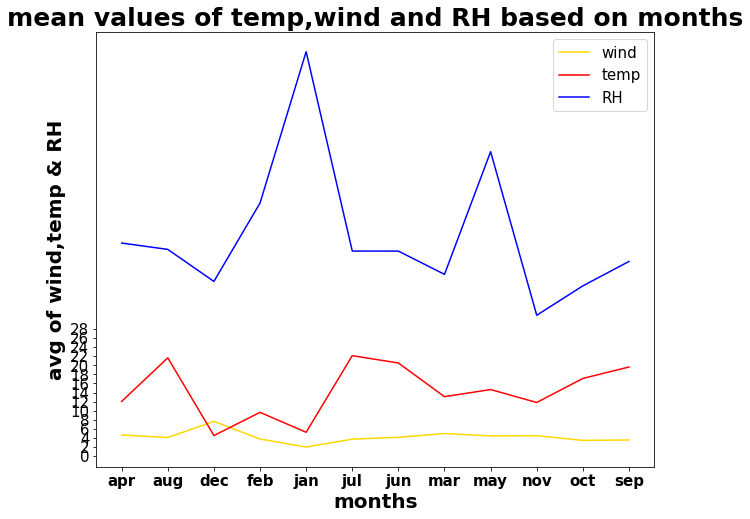

In [ ]:
plt.figure(figsize=(10,8))
x=month['month'].tolist()
y1=month['wind'].tolist()
y2=month['temp'].tolist()
y3=month['RH'].tolist()
plt.plot(x,y1,color='gold',label='wind')
plt.plot(x,y2,color='red',label='temp')
plt.plot(x,y3,color='blue',label='RH')
plt.title("mean values of temp,wind and RH based on months",fontsize=25,fontweight='bold')
plt.xlabel("months",fontsize=20,fontweight='bold')
plt.ylabel("avg of wind,temp & RH",fontsize=20,fontweight='bold')
plt.xticks(x,fontsize=15,fontweight='bold')
plt.yticks(np.arange(0,30,2),fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [ ]:
numerical_feature

Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'area', 'area_km'],
      dtype='object')

In [ ]:
area=data.groupby(['month'])['area'].mean().reset_index()
rh=data.groupby(['month'])['RH'].mean().reset_index()
dc=data.groupby(['month'])['DC'].mean().reset_index()
ffmc=data.groupby(['month'])['FFMC'].mean().reset_index()
dmc=data.groupby(['month'])['DMC'].mean().reset_index()
isi=data.groupby(['month'])['ISI'].mean().reset_index()
month['area']=area['area']
month['rh']=rh['RH']
month['dc']=dc['DC']
month['ffmc']=ffmc['FFMC']
month['dmc']=dmc['DMC']
month['isi']=isi['ISI']
month


,month,wind,temp,rain,area,rh,dc,ffmc,dmc,isi
0,apr,4.666667,12.044444,0.000000,8.891111,46.888889,48.555556,85.788889,15.911111,5.377778
1,aug,4.086413,21.631522,0.058696,12.489076,45.489130,641.077717,92.336957,153.732609,11.072283
2,dec,7.644444,4.522222,0.000000,13.330000,38.444444,351.244444,84.966667,26.122222,3.466667
3,feb,3.755000,9.635000,0.000000,6.275000,55.700000,54.670000,82.905000,9.475000,3.350000
4,jan,2.000000,5.250000,0.000000,0.000000,89.000000,90.350000,50.400000,2.400000,1.450000
5,jul,3.734375,22.109375,0.006250,14.369687,45.125000,450.603125,91.328125,110.387500,9.393750
6,jun,4.135294,20.494118,0.000000,5.841176,45.117647,297.705882,89.429412,93.382353,11.776471
7,mar,4.968519,13.083333,0.003704,4.356667,40.000000,75.942593,89.444444,34.542593,7.107407
8,may,4.450000,14.650000,0.000000,19.240000,67.000000,93.750000,87.350000,26.700000,4.600000
9,nov,4.500000,11.800000,0.000000,0.000000,31.000000,106.700000,79.500000,3.000000,1.100000


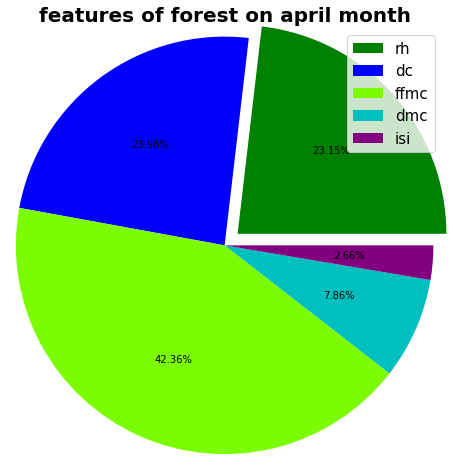

In [ ]:
y1=month['rh'].tolist()
y2=month['dc'].tolist()
y3=month['ffmc'].tolist()
y4=month['dmc'].tolist()
y5=month['isi'].tolist()
plt.figure(figsize=(10,8))
labels=['rh','dc','ffmc','dmc','isi']
piedata=[y1[0],y2[0],y3[0],y4[0],y5[0]]
colors=['green','b','lawngreen','c','purple']
plt.pie(piedata, colors=colors, shadow = False, explode = (0.1,0,0,0,0), radius = 1.2, autopct = '%1.2f%%')
plt.legend(labels,fontsize=15)
plt.title("features of forest on april month",fontsize=20,fontweight='bold')
plt.show()

In [ ]:
data1=data.tail(5)
data1

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


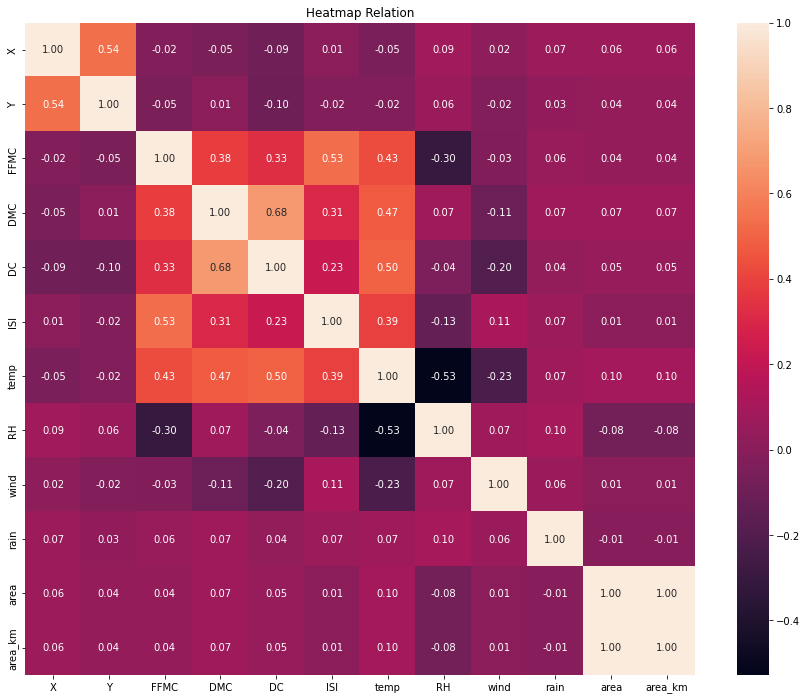

In [ ]:
# heatmap
plt.figure(figsize=(15, 12))
plt.title("Heatmap Relation")
sns.heatmap(data[numerical_feature].corr(), annot=True, fmt='.2f');

Text(0, 0.5, 'temp')

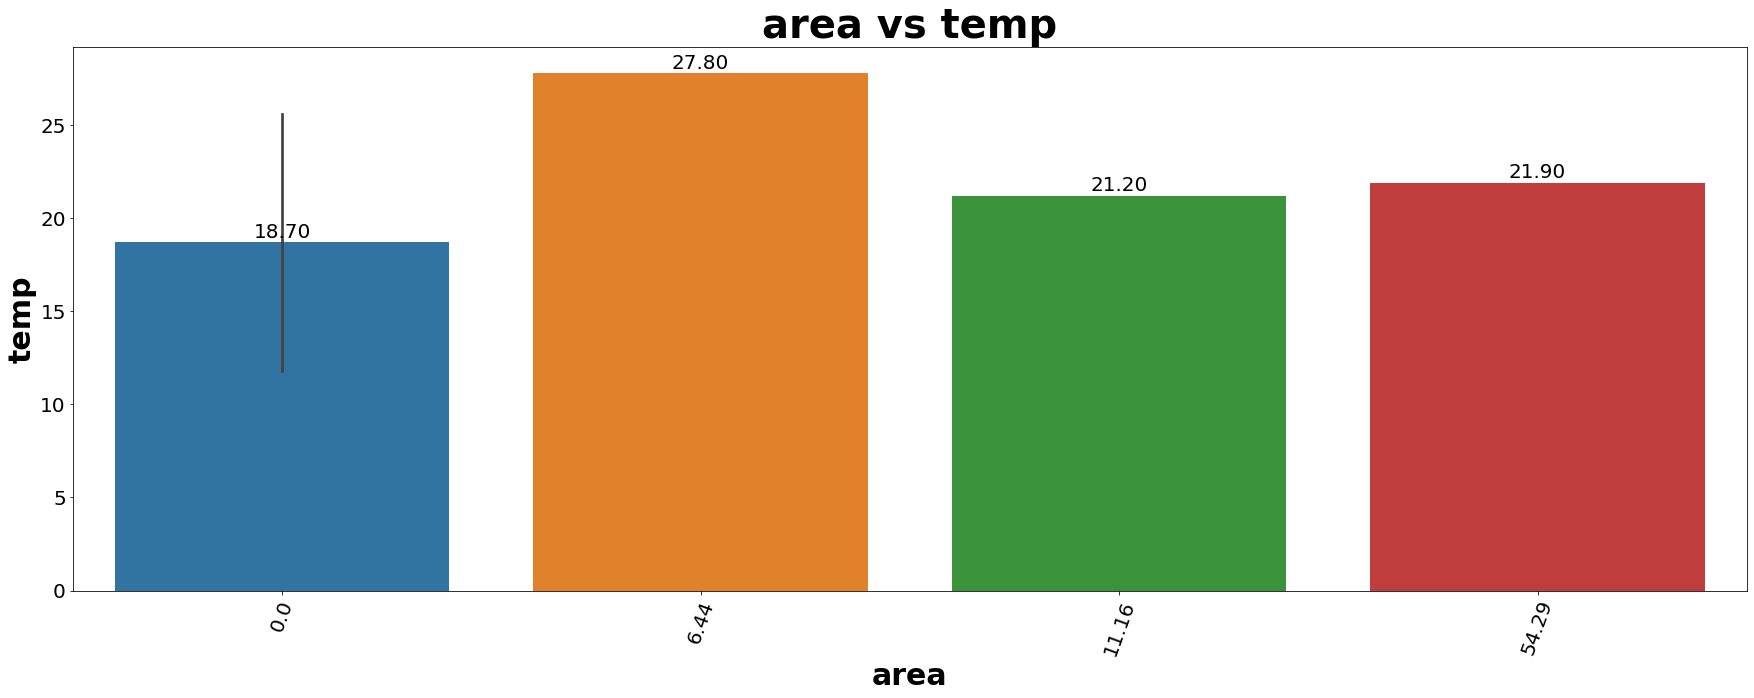

In [ ]:
plt.figure(figsize = (30,10))
b1=sns.barplot(x = 'area', y = 'temp', data = data1)
for p in b1.patches:
 b1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points',fontsize=20)
plt.title("area vs temp",fontsize=40,fontweight='bold')
plt.xticks(rotation=70,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("area",fontsize=30,fontweight='bold')
plt.ylabel("temp",fontsize=30,fontweight='bold')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


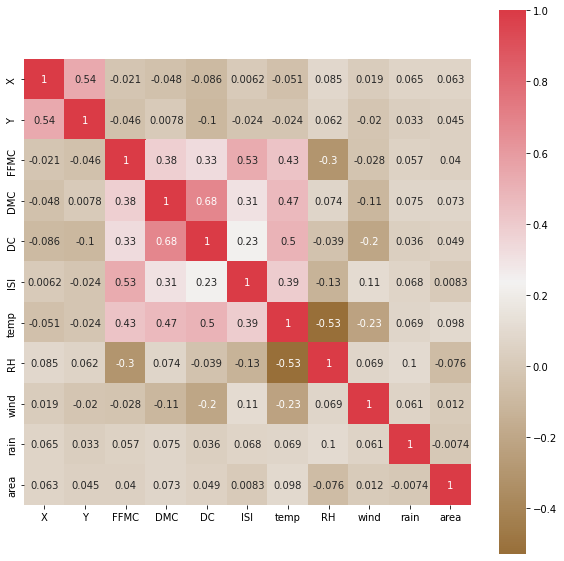

In [ ]:
f, ax = plt.subplots(figsize = (10, 10))
corr = data.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), annot=True,
cmap = sns.diverging_palette(50, 10, as_cmap = True), square = True, ax = ax)

Text(0, 0.5, 'temp')

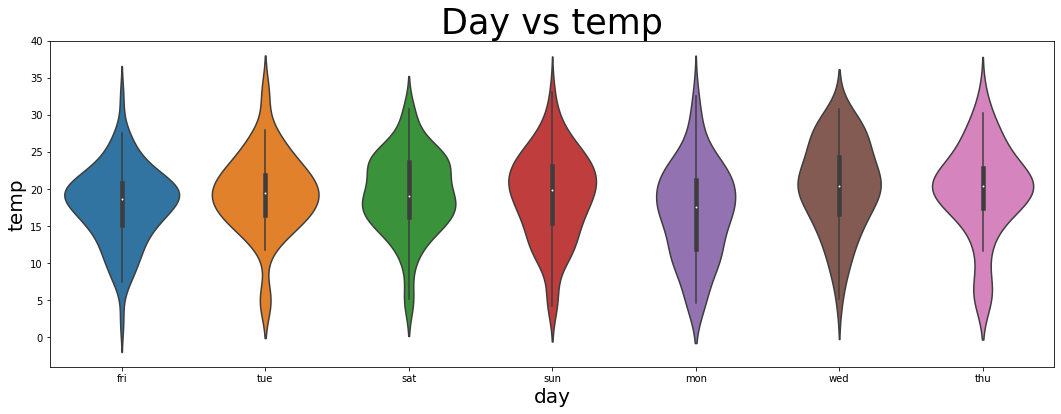

In [ ]:
# average temperature on each individual day with day in x-axis and
temp in y-axis of the data present in the dataset
plt.figure(figsize = (18, 6))
sns.violinplot(x = 'day', y = 'temp', data = data)
plt.title('Day vs temp',fontsize=35)
plt.xlabel("day",fontsize=20)
plt.ylabel("temp",fontsize=20)


Text(0, 0.5, 'rain')

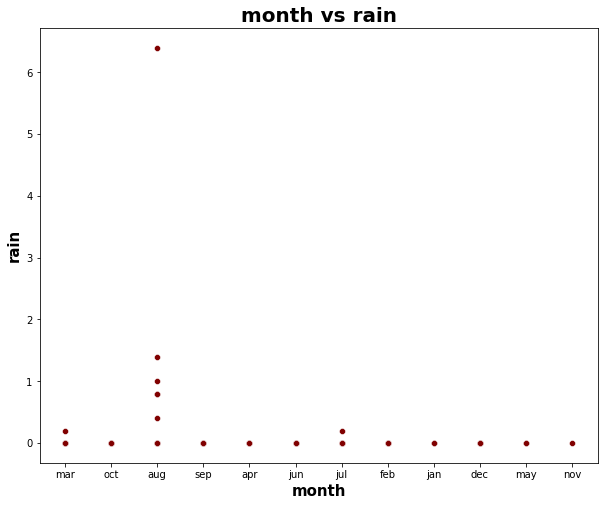

In [ ]:
# rate of rain,month in x-axis and rain in yaxis and predicts the rain in each month.
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'month', y = 'rain', data = data,color='maroon')
plt.title('month vs rain',fontsize=20,fontweight='bold')
plt.xlabel("month",fontsize=15,fontweight='bold')
plt.ylabel("rain",fontsize=15,fontweight='bold')


In [ ]:
# 1. Boxplot    -
# 2. Map function
# 3. Rename()
# 4. Groupby() - 
# 5. Bar() -
# 6. Barh()
# 7. Histplot()
# 8. Pairplot()
# 9. Distplot()
# 10. Jointplot()
# 11. Stripplot()
# 12. Violinplot() -
# 13. Heatmap() -
# 14. Scatter() -
# 15. Pie() -
# 16. Corr() - 
# 17. SimpleImputer()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


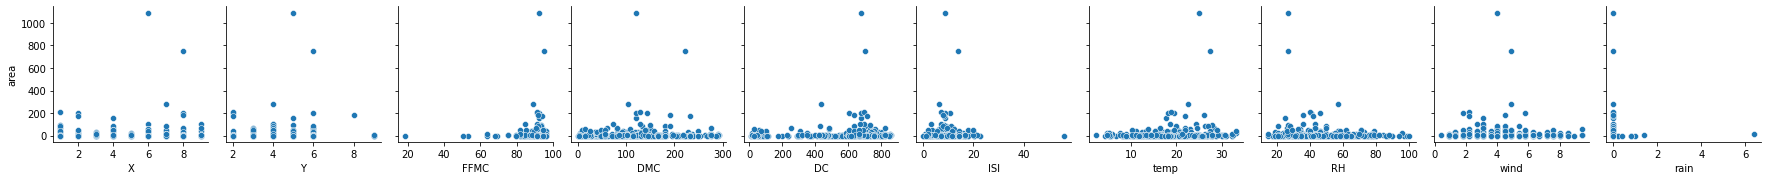

In [ ]:
sb.pairplot(data = data,y_vars=['area'],x_vars=['X','Y','FFMC','DMC','DC','ISI','temp','RH','wind','rain'])

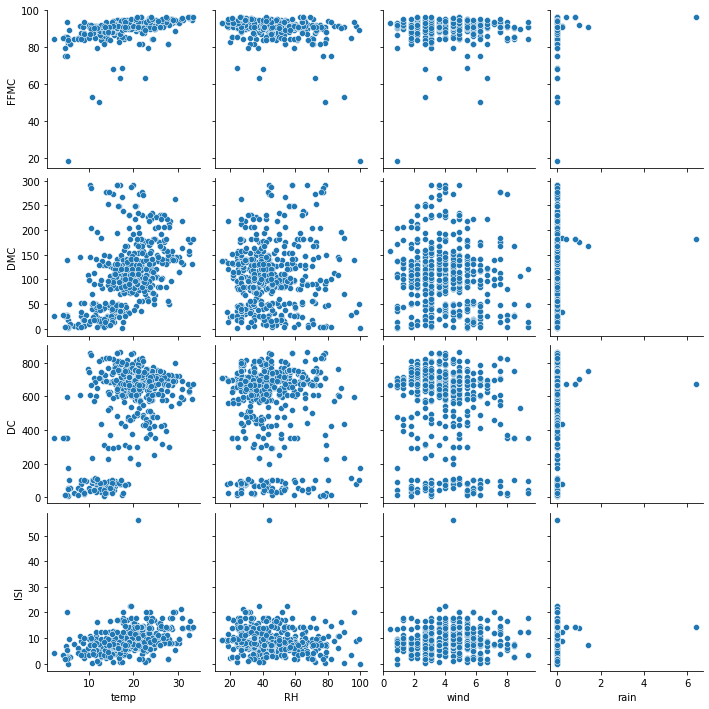

In [ ]:
sb.pairplot(data = data,y_vars=['FFMC','DMC','DC','ISI'],x_vars=['temp','RH','wind','rain'])